In [1]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.dpi'] = 120

In [2]:
#hog人脸检测模型
hog_face_detector = dlib.get_frontal_face_detector()

In [3]:
#人脸68个关键点检测模型
shape_detector = dlib.shape_predictor('./weights/shape_predictor_68_face_landmarks.dat')

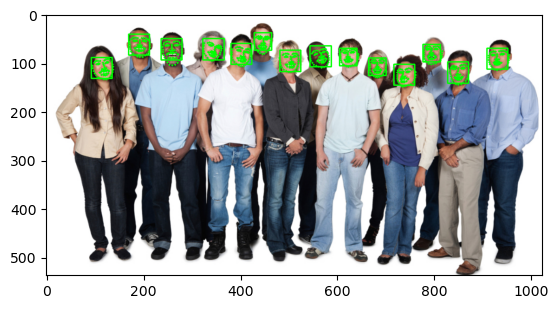

In [4]:
img = cv2.imread('./images/faces2.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
detections = hog_face_detector(img_gray,1)

for face in detections:
    #人脸框坐标
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
    #68个关键点坐标
    points = shape_detector(img_gray,face)
    for i in range(0,68):
        cv2.circle(img,(points.part(i).x,points.part(i).y),2,(0,255,0),-1)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [5]:
#面部特征描述符

#人脸检测模型
hog_face_detector = dlib.get_frontal_face_detector()
#人脸68个关键点检测模型
shape_detector = dlib.shape_predictor('./weights/shape_predictor_68_face_landmarks.dat')
#resnet模型
face_descriptor_extractor = dlib.face_recognition_model_v1('./weights/dlib_face_recognition_resnet_model_v1.dat')

In [6]:
def getFaceFeatLable(fileName):
    lable_id = int(fileName.split('/')[-1].split('.')[0].split('subject')[-1])
    
    cap = cv2.VideoCapture(fileName)
    ret,img = cap.read()
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2GRAY)
    
    detections = hog_face_detector(gray,1)
    face_descriptor = None
    
    for face in detections:
        #68个关键点
        points = shape_detector(img,face)
        #特征描述符
        face_descriptor = face_descriptor_extractor.compute_face_descriptor(img,points)
        face_descriptor = np.array(face_descriptor).reshape(1,-1)
    return lable_id,face_descriptor

In [7]:
lable,feat = getFaceFeatLable('./yalefaces/train/subject01.normal.gif')

In [8]:
lable

1

In [9]:
feat.shape

(1, 128)

In [10]:
import glob

file_list = glob.glob('./yalefaces/train/*')
lable_list = []
name_list = {}
feature_list = None 

index=0
for train_file in file_list:
    lable,feat = getFaceFeatLable(train_file)
    if feat is not None:
        lable_list.append(lable)
        name_list[index]=train_file
        index += 1
        
        if feature_list is None:
            feature_list = feat
        else:
            feature_list = np.concatenate((feature_list,feat))
        

In [11]:
name_list

{0: './yalefaces/train\\subject01.glasses.gif',
 1: './yalefaces/train\\subject01.leftlight.gif',
 2: './yalefaces/train\\subject01.noglasses.gif',
 3: './yalefaces/train\\subject01.normal.gif',
 4: './yalefaces/train\\subject01.sad.gif',
 5: './yalefaces/train\\subject01.sleepy.gif',
 6: './yalefaces/train\\subject01.surprised.gif',
 7: './yalefaces/train\\subject01.wink.gif',
 8: './yalefaces/train\\subject02.glasses.gif',
 9: './yalefaces/train\\subject02.happy.gif',
 10: './yalefaces/train\\subject02.noglasses.gif',
 11: './yalefaces/train\\subject02.normal.gif',
 12: './yalefaces/train\\subject02.rightlight.gif',
 13: './yalefaces/train\\subject02.sad.gif',
 14: './yalefaces/train\\subject02.sleepy.gif',
 15: './yalefaces/train\\subject02.surprised.gif',
 16: './yalefaces/train\\subject02.wink.gif',
 17: './yalefaces/train\\subject03.centerlight.gif',
 18: './yalefaces/train\\subject03.happy.gif',
 19: './yalefaces/train\\subject03.noglasses.gif',
 20: './yalefaces/train\\subject0

In [12]:
len(lable_list)

132

In [13]:
len(name_list)

132

In [14]:
feature_list.shape

(132, 128)

In [15]:
#计算人脸特征描述符的范式距离
np.linalg.norm(feature_list[100]-feature_list[100])

0.0

In [16]:
#同一人的不同表情  距离较小
np.linalg.norm(feature_list[100]-feature_list[103])

0.39992918511761194

In [17]:
#不同人的人脸  距离较大
np.linalg.norm(feature_list[100]-feature_list[60])

0.9109626823083957

In [18]:
#计算一个特征描述符与所有特征的距离
np.linalg.norm(feature_list[0]-feature_list[:],axis=1)

array([0.        , 0.48992029, 0.37211911, 0.35581028, 0.51543908,
       0.48151447, 0.54761613, 0.49566379, 0.6950431 , 0.77329649,
       0.73359842, 0.73359842, 0.73421626, 0.73696717, 0.73482733,
       0.74683863, 0.76282718, 0.85345605, 0.76441795, 0.80798221,
       0.80798221, 0.77109683, 0.78844059, 0.80426717, 0.76877739,
       0.78156313, 0.94512002, 0.89450371, 0.91552612, 0.92289976,
       0.90163334, 0.92874091, 0.90163334, 0.90006939, 0.8960838 ,
       0.7656308 , 0.73200037, 0.7655796 , 0.74759713, 0.73759675,
       0.75155068, 0.77416643, 0.75906315, 0.83163383, 0.83925553,
       0.86775178, 0.86775178, 0.89771323, 0.86838225, 0.88262811,
       0.82586691, 0.89110904, 0.88370862, 0.76782481, 0.90608703,
       0.90608703, 0.89297016, 0.90314584, 0.88692007, 0.89899775,
       0.89250993, 0.88344023, 0.88311846, 0.85766729, 0.84975744,
       0.93234985, 0.85751841, 0.87528151, 0.83665292, 0.87857221,
       0.83686733, 0.7253908 , 0.82191077, 0.78971114, 0.81990

In [19]:
np.linalg.norm(feature_list[0]-feature_list[1:],axis=1)

array([0.48992029, 0.37211911, 0.35581028, 0.51543908, 0.48151447,
       0.54761613, 0.49566379, 0.6950431 , 0.77329649, 0.73359842,
       0.73359842, 0.73421626, 0.73696717, 0.73482733, 0.74683863,
       0.76282718, 0.85345605, 0.76441795, 0.80798221, 0.80798221,
       0.77109683, 0.78844059, 0.80426717, 0.76877739, 0.78156313,
       0.94512002, 0.89450371, 0.91552612, 0.92289976, 0.90163334,
       0.92874091, 0.90163334, 0.90006939, 0.8960838 , 0.7656308 ,
       0.73200037, 0.7655796 , 0.74759713, 0.73759675, 0.75155068,
       0.77416643, 0.75906315, 0.83163383, 0.83925553, 0.86775178,
       0.86775178, 0.89771323, 0.86838225, 0.88262811, 0.82586691,
       0.89110904, 0.88370862, 0.76782481, 0.90608703, 0.90608703,
       0.89297016, 0.90314584, 0.88692007, 0.89899775, 0.89250993,
       0.88344023, 0.88311846, 0.85766729, 0.84975744, 0.93234985,
       0.85751841, 0.87528151, 0.83665292, 0.87857221, 0.83686733,
       0.7253908 , 0.82191077, 0.78971114, 0.81990323, 0.81990

In [20]:
np.argmin(np.linalg.norm(feature_list[0]-feature_list[1:],axis=1))

2

In [21]:
np.linalg.norm(feature_list[0]-feature_list[1:],axis=1)[2]

0.35581028298402767

In [22]:
name_list[1+2]

'./yalefaces/train\\subject01.normal.gif'

In [23]:
np.linalg.norm(feature_list[0]-feature_list[3])

0.35581028298402767

C:\Users\18221\AppData\Local\Temp\ipykernel_6124\2286518578.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


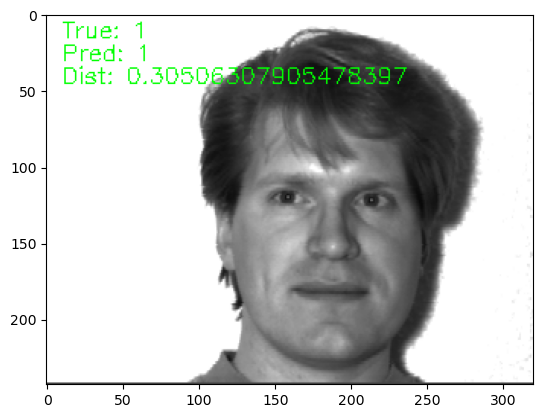

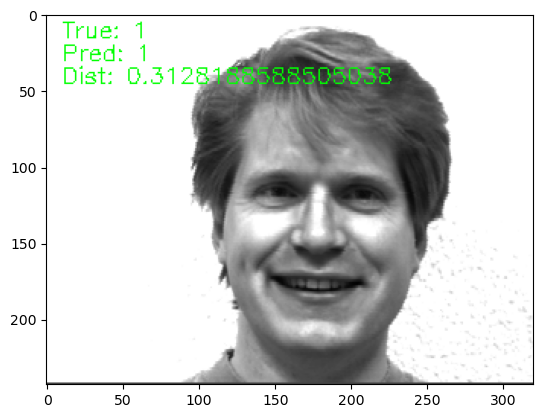

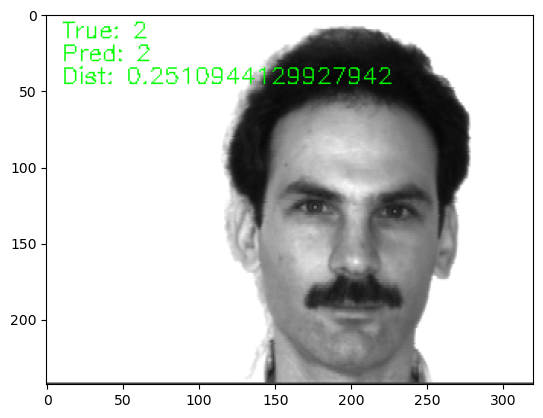

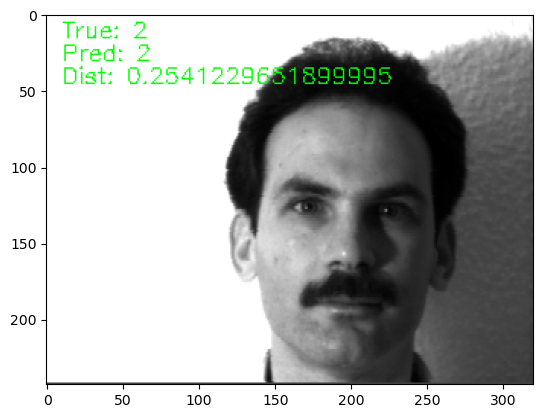

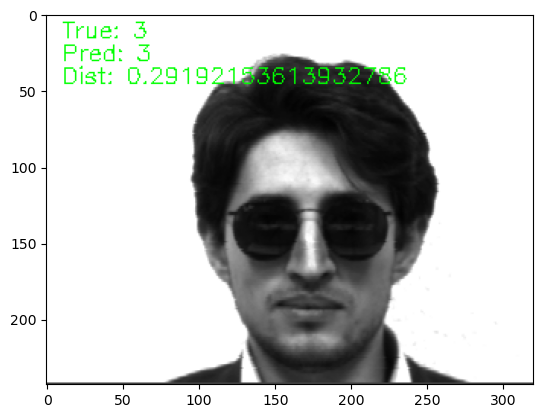

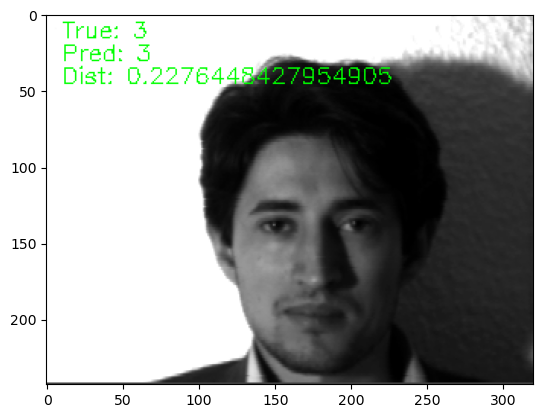

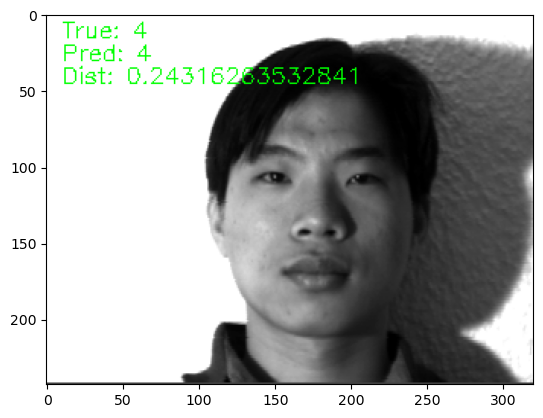

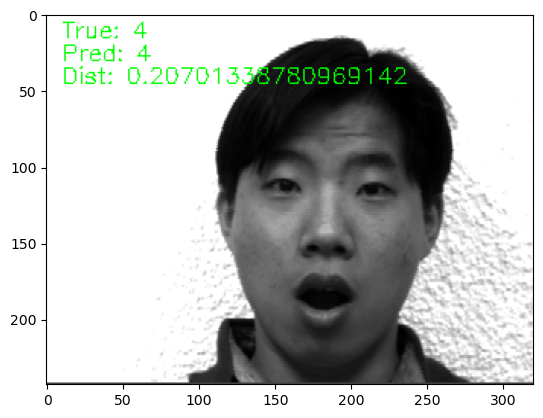

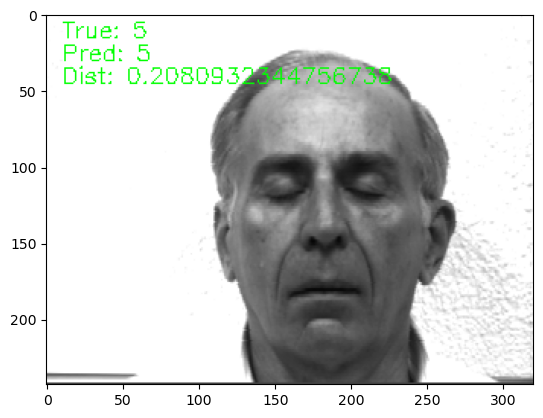

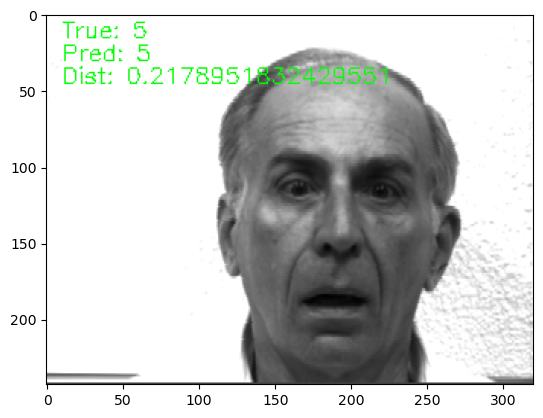

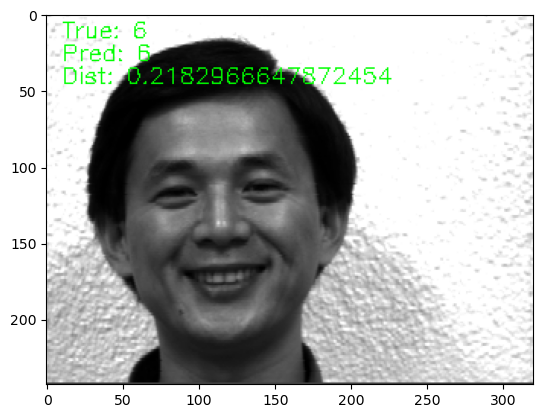

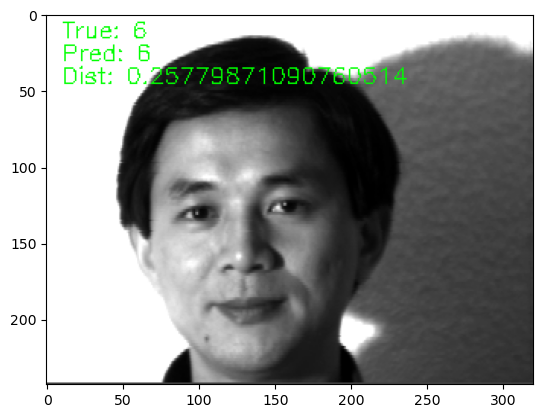

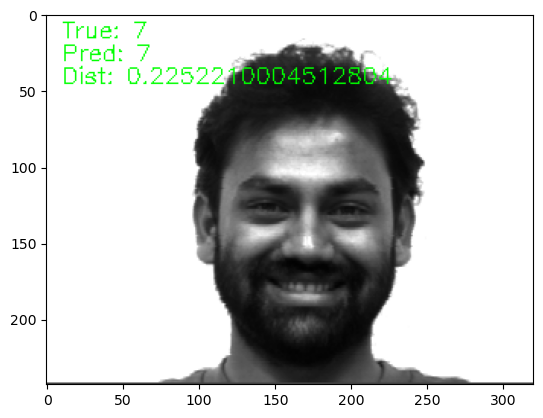

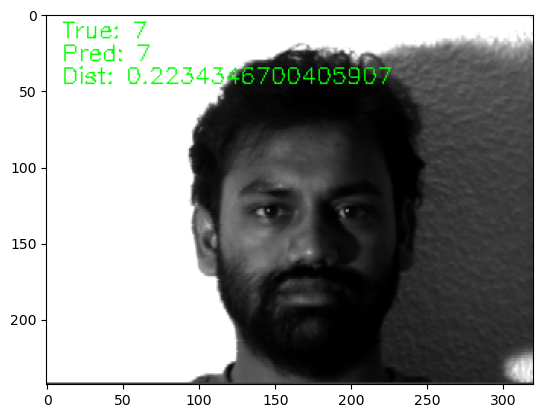

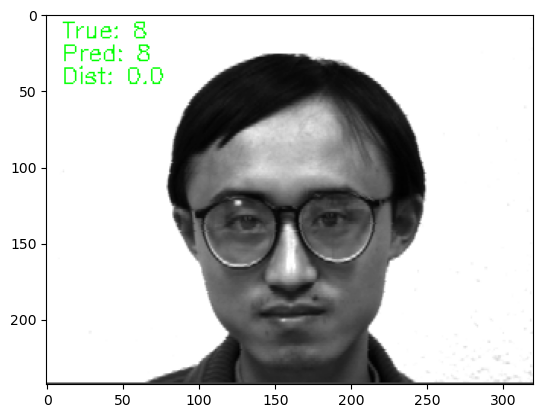

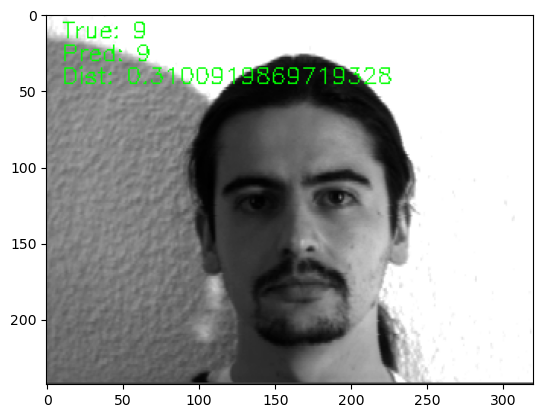

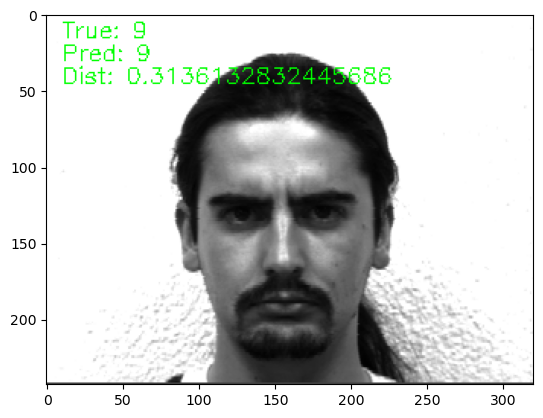

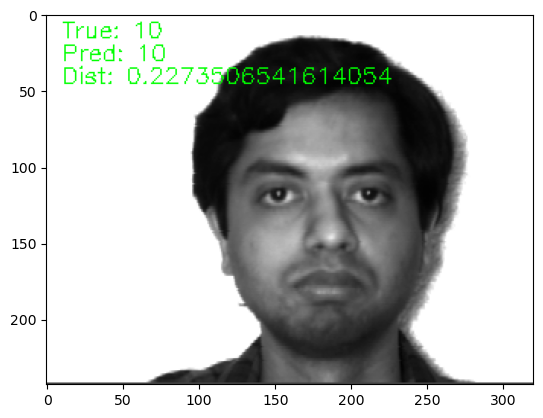

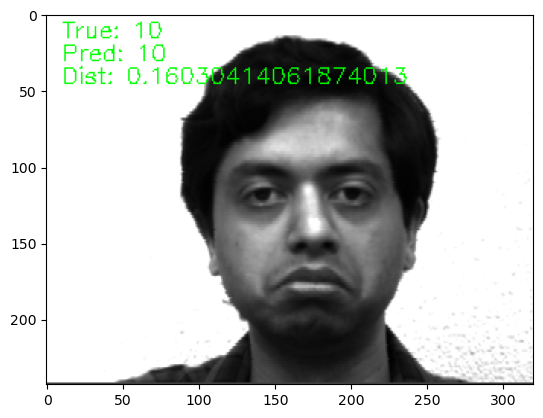

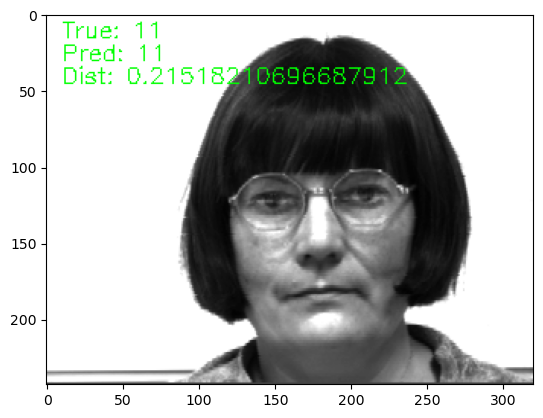

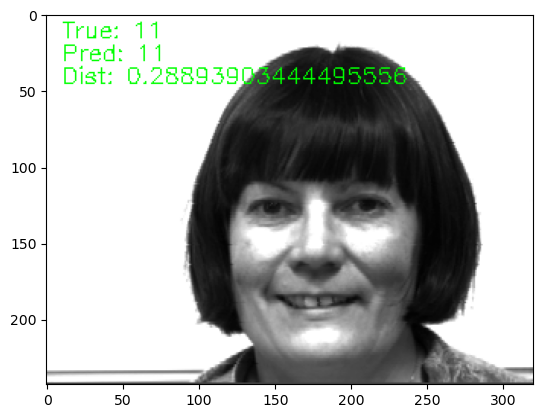

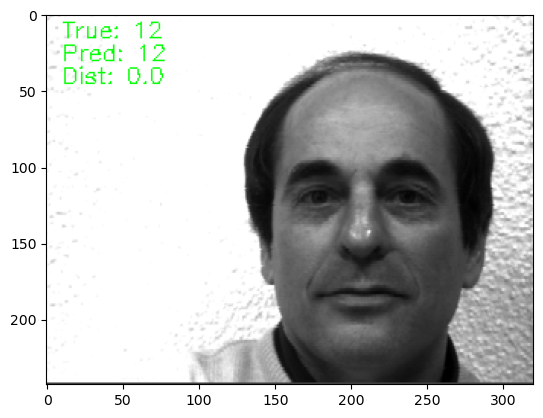

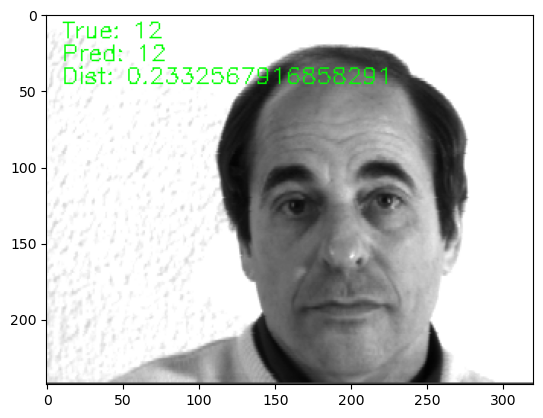

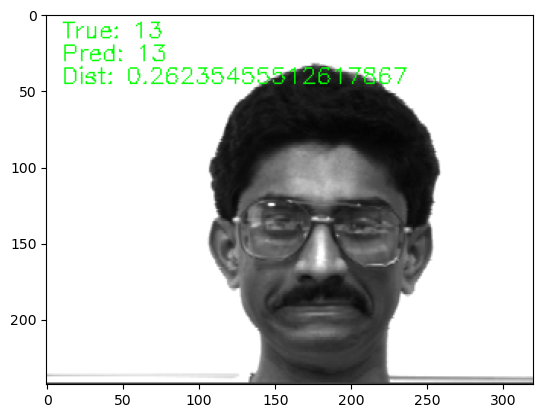

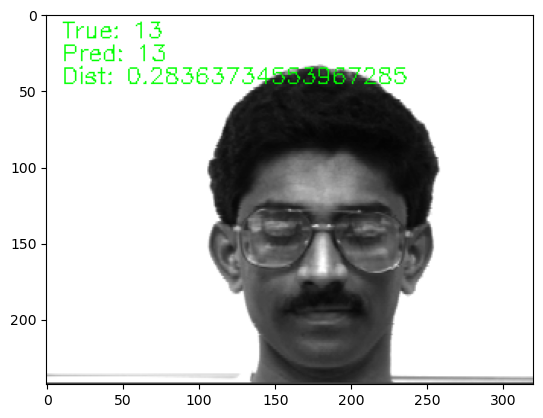

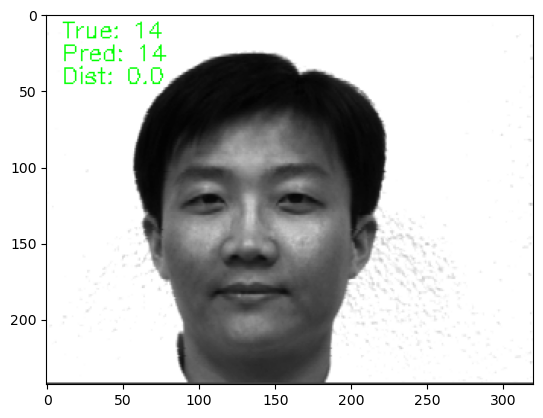

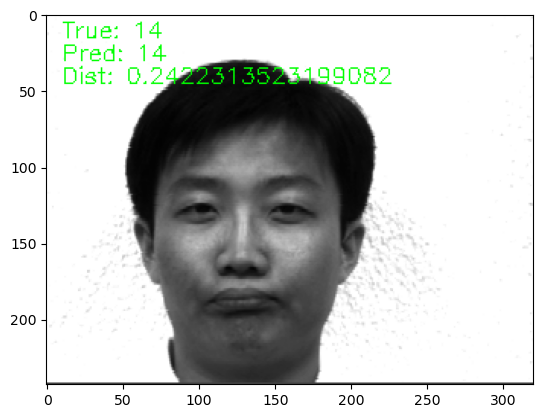

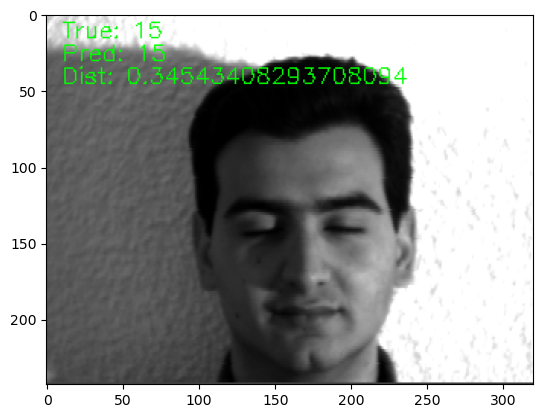

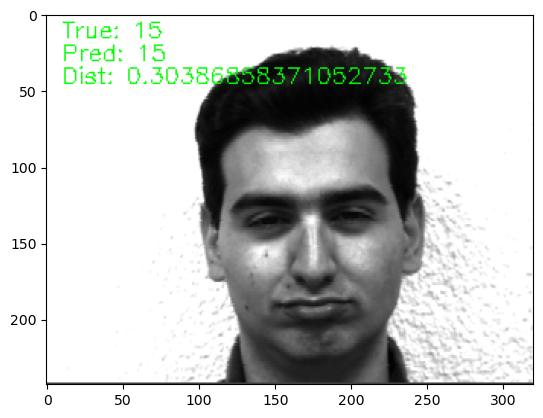

In [24]:
#评估测试数据集

file_list = glob.glob('./yalefaces/test/*')

predict_list = []
lable_list = []
#设置阈值0.5
threshold = 0.5

for test_file in file_list:
    lable,feat = getFaceFeatLable(test_file)
    
    cap = cv2.VideoCapture(test_file)
    ret,img = cap.read()
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #过滤数据
    if feat is not None:
        distances = np.linalg.norm(feat-feature_list,axis=1)
        min_index = np.argmin(distances)
        min_distance = distances[min_index]
        
        if min_distance < threshold:
            predict_id = int(name_list[min_index].split('/')[-1].split('.')[0].split('subject')[-1])
        else :
            predict_id = -1
        
        predict_list.append(predict_id)
        lable_list.append(lable)
        
        cv2.putText(img,'True: '+str(lable),(10,15),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0))
        cv2.putText(img,'Pred: '+str(predict_id),(10,30),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0))
        cv2.putText(img,'Dist: '+str(min_distance),(10,45),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0))
        
        plt.figure()
        plt.imshow(img)

In [25]:
#评估测试集
from sklearn.metrics import accuracy_score
accuracy_score(lable_list,predict_list)

1.0

In [26]:
#融合矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(lable_list,predict_list)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]], dtype=int64)

<Axes: >

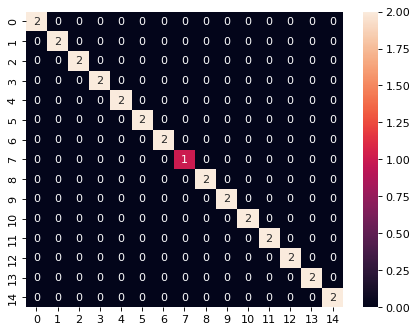

In [27]:
#可视化
import seaborn
plt.rcParams['figure.dpi'] = 80
seaborn.heatmap(cm,annot=True)